# Hearth Disease diagnostics

## Data Source
Data for this project is available on https://archive.ics.uci.edu/dataset/45/heart+disease

In [33]:
import pandas as pd
import numpy as np
import matplotlib as plt

columns = ['age', 'sex',
           'cp', 'trestbps',
           'chol', 'fbs',
           'restecg', 'thalach',
           'exang', 'oldpeak',
           'slope', 'ca',
           'thal', 'num']

data = pd.read_csv("processed.cleveland.data", names=columns, header=None)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


## Feature Description
Taken from https://archive.ics.uci.edu/dataset/45/heart+disease

|Attribute Name|Role|Type|Demographic|Description|Units|Missing Values|
| --- | --- | --- | --- | --- | --- | --- |
|age|Feature|Integer|Age||years|false|
|sex|Feature|Categorical|Sex|||false|
|cp|Feature|Categorical|Value 1: typical angina <br> Value 1: typical angina <br> Value 2: atypical angina <br> Value 3: non-anginal pain <br> Value 4: asymptomatic|||false|
|trestbps|Feature|Integer||resting blood pressure (on admission to the hospital)|mm Hg|false|
|chol|Feature|Integer||serum cholestoral|mg/dl|false|
|fbs|Feature|Categorical||fasting blood sugar > 120 mg/dl|0-1|false|
|restecg|Feature|Categorical||||false|
|thalach|Feature|Integer||maximum heart rate achieved||false|
|exang|Feature|Categorical||exercise induced angina||false|
|oldpeak|Feature|Integer||ST depression induced by exercise relative to rest||false|
                                                            		

## Visualizing data

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>],
       [<AxesSubplot: title={'center': 'trestbps'}>,
        <AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>],
       [<AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>,
        <AxesSubplot: title={'center': 'exang'}>],
       [<AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'num'}>]], dtype=object)

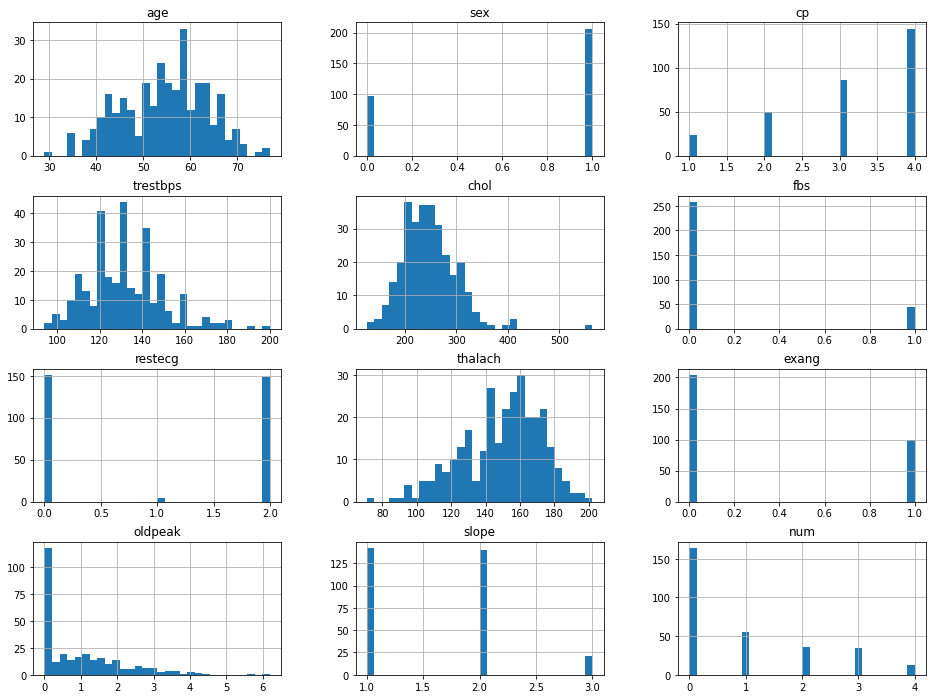

In [34]:
data.hist(figsize=(16,12), bins=30)

## Spliting data between labels and features

In [54]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Activation, Normalization
import tensorflow as tf
features = columns
try:
    features.remove('num')
except ValueError:
    pass

y = data['num']
X = data[features]

X = X.replace('?', np.NaN)
X = X.fillna(method='ffill')
print(X.isnull().sum().sum())
X = np.asarray(X.values).astype('float32')



0


In [55]:
from statistics import mean
model = Sequential()
model.add(Normalization())
model.add(Dense(16, activation=tf.nn.relu))
model.add(Dense(8, activation=tf.nn.relu))
model.add(Dense(8, activation=tf.nn.relu))
model.add(Dense(5, activation=tf.nn.relu))
model.compile(optimizer = 'sgd',
              loss = 'mean_absolute_error',
              metrics = ['accuracy'])

val_acc_all = []

skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X, y): 
    X_train_fold, X_test_fold = X[train_index, :], X[test_index, :] 
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model.fit(X_train_fold, y_train_fold, epochs = 10) 
    # scores.append(model.score(X_test_fold, y_test_fold))

    val_loss, val_acc = model.evaluate(X_test_fold, y_test_fold)
    val_acc_all.append(val_acc)
    tf.keras.backend.clear_session()

    print("Accuracy score for neural network: %.3f (%.3f)" % (val_acc, val_loss))

    print("Accuracy score for neural network for channel : %.3f (%.3f)" % (val_acc, val_loss))

print('Maximum Accuracy',max(val_acc_all)) 
print('Minimum Accuracy:',min(val_acc_all)) 
print('Overall Accuracy:',mean(val_acc_all))

Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 1.5534 - accuracy: 0.4154
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9385 - accuracy: 0.5404
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9364 - accuracy: 0.5404
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.5404
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.9367 - accuracy: 0.5404
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9369 - accuracy: 0.5404
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9369 - accuracy: 0.5404
Epoch 8/10
9/9 [==============================] - 0s 4ms/step - loss: 0.9366 - accuracy: 0.5368
Epoch 9/10
9/9 [==============================] - 0s 5ms/step - loss: 0.9370 - accuracy: 0.5404
Epoch 10/10
1/1 [==============================] - 0s 229ms/step - loss: 0.9381 - accuracy: 0.5484
Accuracy score for neural network: 0.